In [52]:
import os
from pathlib import Path
from tqdm import tqdm

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from patchify import patchify


In [68]:
print(len(os.listdir('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/images')))
print(len(os.listdir('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/masks')))

41
41


(9636, 9095, 3)


(-0.5, 9094.5, 9635.5, -0.5)

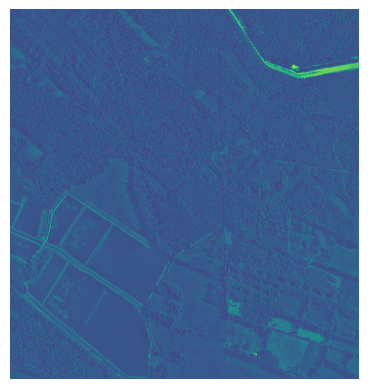

In [13]:
temp_img = cv2.imread('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/images/M-33-20-D-c-4-2.tif')
print(temp_img.shape)
plt.imshow(temp_img[:,:,0])
plt.axis(False)

In [15]:
temp_mask = cv2.imread('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/masks/M-33-20-D-c-4-2.tif')
print(temp_mask.shape)
labels, counts = np.unique(temp_mask[:,:,0], return_counts=True)
print(f'Labels: {labels} and corresponding counts: {counts}')

(9636, 9095, 3)
Labels: [0 1 2 3 4] and corresponding counts: [18008335    46512 59476087  9553859   554627]


In [93]:
root_dir = '/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/'

img_dir = root_dir + 'images/'
print(img_dir)

/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/images/


In [96]:
# os.makedirs('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/imgs_256x256/')
os.makedirs('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/masks_256x256/')

In [73]:
patch_size = 256

for path, subdirs, files in os.walk(img_dir):
    directory_name = path.split(os.path.sep)[-1]
    imgs = os.listdir(path)

    for img_name in tqdm(imgs, desc='Processing'):
        if img_name.endswith('.tif'):
            img = cv2.imread(os.path.join(path, img_name), 1) # read as BGR

            SIZE_X = (img.shape[1] // patch_size) * patch_size
            SIZE_Y = (img.shape[0] // patch_size) * patch_size

            img = Image.fromarray(img)
            img = img.crop((0, 0, SIZE_X, SIZE_Y)) # Crop from top left

            img = np.array(img)  
            # now I have the images which are divisible by 256 (patch_size)

            # create patches for each image
            print(f'Creating patches for {img_name}')
            img_patches = patchify(
                image=img,
                patch_size=(256, 256, 3),
                step=256 # ensures no overlapping of patches
            )

            for i in range(img_patches.shape[0]):
                for j in range(img_patches.shape[1]):

                    single_img_patch = img_patches[i,j,:,:]
                    # remove extra dimension which patchify adds
                    single_img_patch = single_img_patch[0] 

                    cv2.imwrite(
                        os.path.join(root_dir, 'imgs_256x256', f"{os.path.splitext(img_name)[0]}_patch_{i}_{j}.tif"), single_img_patch
                    )

Processing:   0%|          | 0/41 [00:00<?, ?it/s]

Creating patches for M-34-56-A-b-1-4.tif


Processing:   2%|▏         | 1/41 [00:06<04:21,  6.54s/it]

Creating patches for N-34-97-D-c-2-4.tif


Processing:   5%|▍         | 2/41 [00:08<02:21,  3.62s/it]

Creating patches for M-33-20-D-c-4-2.tif


Processing:   7%|▋         | 3/41 [00:15<03:22,  5.33s/it]

Creating patches for N-34-97-C-b-1-2.tif


Processing:  10%|▉         | 4/41 [00:17<02:23,  3.88s/it]

Creating patches for M-34-51-C-d-4-1.tif


Processing:  12%|█▏        | 5/41 [00:23<02:57,  4.93s/it]

Creating patches for M-33-32-B-b-4-4.tif


Processing:  15%|█▍        | 6/41 [00:30<03:10,  5.44s/it]

Creating patches for N-33-60-D-d-1-2.tif


Processing:  17%|█▋        | 7/41 [00:31<02:21,  4.17s/it]

Creating patches for N-34-61-B-a-1-1.tif


Processing:  20%|█▉        | 8/41 [00:33<01:52,  3.40s/it]

Creating patches for M-34-68-B-a-1-3.tif


Processing:  22%|██▏       | 9/41 [00:41<02:37,  4.92s/it]

Creating patches for N-34-106-A-b-3-4.tif


Processing:  24%|██▍       | 10/41 [00:48<02:49,  5.46s/it]

Creating patches for N-34-140-A-d-4-2.tif


Processing:  27%|██▋       | 11/41 [00:54<02:50,  5.69s/it]

Creating patches for M-34-32-B-b-1-3.tif


Processing:  29%|██▉       | 12/41 [01:04<03:18,  6.85s/it]

Creating patches for M-34-51-C-b-2-1.tif


Processing:  32%|███▏      | 13/41 [01:11<03:15,  6.97s/it]

Creating patches for N-34-77-A-b-1-4.tif


Processing:  34%|███▍      | 14/41 [01:17<03:01,  6.74s/it]

Creating patches for M-33-48-A-c-4-4.tif


Processing:  37%|███▋      | 15/41 [01:24<02:58,  6.86s/it]

Creating patches for M-33-20-D-d-3-3.tif


Processing:  39%|███▉      | 16/41 [01:33<03:07,  7.49s/it]

Creating patches for N-34-94-A-b-2-4.tif


Processing:  41%|████▏     | 17/41 [01:40<02:52,  7.17s/it]

Creating patches for N-33-104-A-c-1-1.tif


Processing:  44%|████▍     | 18/41 [01:47<02:43,  7.09s/it]

Creating patches for M-34-65-D-d-4-1.tif


Processing:  46%|████▋     | 19/41 [01:53<02:30,  6.84s/it]

Creating patches for M-34-6-A-d-2-2.tif


Processing:  49%|████▉     | 20/41 [01:59<02:19,  6.63s/it]

Creating patches for N-34-140-A-d-3-4.tif


Processing:  51%|█████     | 21/41 [02:05<02:10,  6.51s/it]

Creating patches for N-33-130-A-d-4-4.tif


Processing:  54%|█████▎    | 22/41 [02:12<02:04,  6.57s/it]

Creating patches for M-34-65-D-a-4-4.tif


Processing:  56%|█████▌    | 23/41 [02:19<01:59,  6.65s/it]

Creating patches for N-34-140-A-b-3-2.tif


Processing:  59%|█████▊    | 24/41 [02:25<01:50,  6.48s/it]

Creating patches for N-33-139-C-d-2-4.tif


Processing:  61%|██████    | 25/41 [02:32<01:45,  6.61s/it]

Creating patches for M-33-7-A-d-2-3.tif


Processing:  63%|██████▎   | 26/41 [02:39<01:41,  6.77s/it]

Creating patches for N-34-106-A-c-1-3.tif


Processing:  66%|██████▌   | 27/41 [02:45<01:31,  6.56s/it]

Creating patches for N-34-140-A-b-4-2.tif


Processing:  68%|██████▊   | 28/41 [02:51<01:22,  6.38s/it]

Creating patches for N-33-130-A-d-3-3.tif


Processing:  71%|███████   | 29/41 [02:57<01:14,  6.21s/it]

Creating patches for N-33-139-D-c-1-3.tif


Processing:  73%|███████▎  | 30/41 [03:04<01:11,  6.53s/it]

Creating patches for N-33-139-C-d-2-2.tif


Processing:  76%|███████▌  | 31/41 [03:11<01:07,  6.74s/it]

Creating patches for M-34-5-D-d-4-2.tif


Processing:  78%|███████▊  | 32/41 [03:17<00:59,  6.56s/it]

Creating patches for N-33-119-C-c-3-3.tif


Processing:  80%|████████  | 33/41 [03:19<00:40,  5.09s/it]

Creating patches for N-34-66-C-c-4-3.tif


Processing:  83%|████████▎ | 34/41 [03:21<00:27,  3.98s/it]

Creating patches for M-34-77-B-c-2-3.tif


Processing:  85%|████████▌ | 35/41 [03:27<00:28,  4.71s/it]

Creating patches for N-33-96-D-d-1-1.tif


Processing:  88%|████████▊ | 36/41 [03:28<00:18,  3.76s/it]

Creating patches for M-34-55-B-b-4-1.tif


Processing:  90%|█████████ | 37/41 [03:36<00:19,  4.83s/it]

Creating patches for M-34-32-B-a-4-3.tif


Processing:  93%|█████████▎| 38/41 [03:42<00:15,  5.19s/it]

Creating patches for N-33-60-D-c-4-2.tif


Processing:  95%|█████████▌| 39/41 [03:44<00:08,  4.24s/it]

Creating patches for M-34-65-D-c-4-2.tif


Processing:  98%|█████████▊| 40/41 [03:50<00:04,  4.95s/it]

Creating patches for M-33-7-A-d-3-2.tif


Processing: 100%|██████████| 41/41 [03:57<00:00,  5.80s/it]


In [97]:
mask_dir = root_dir + 'masks/'
print(mask_dir)

patch_size = 256

for path, subdirs, files in os.walk(mask_dir):
    directory_name = path.split(os.path.sep)[-1]
    masks = os.listdir(path)

    for mask_name in tqdm(masks, desc="Processing"):
        if mask_name.endswith('.tif'):
            mask = cv2.imread(os.path.join(path, mask_name), 0)  # Grey

            SIZE_X = (mask.shape[1] // patch_size) * patch_size
            SIZE_Y = (mask.shape[0] // patch_size) * patch_size

            mask = Image.fromarray(mask)
            mask = mask.crop((0, 0, SIZE_X, SIZE_Y))  # Crop from top left
            mask = np.array(mask)
            # now I have the images which are divisible by 256 (patch_size)

            # create patches for each image
            mask_patches = patchify(
                image=mask,
                patch_size=(256, 256),
                step=256  # ensures no overlapping of patches
            )

            for i in range(mask_patches.shape[0]):
                for j in range(mask_patches.shape[1]):
                    single_mask_patch = mask_patches[i, j, :, :]
                    # remove extra dimension which patchify adds
                    single_mask_patch = single_mask_patch[0]

                    cv2.imwrite(
                        os.path.join(root_dir, 'masks_256x256', f"{os.path.splitext(mask_name)[0]}_patch_{i}_{j}.tif"), single_mask_patch
                    )

/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/masks/


Processing: 100%|██████████| 41/41 [00:39<00:00,  1.04it/s]


In [98]:
print(len(os.listdir('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/imgs_256x256')))
print(len(os.listdir('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/masks_256x256')))

44122
44122


(256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

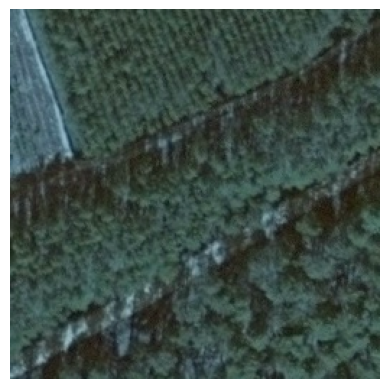

In [76]:
temp_img = cv2.imread('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/imgs_256x256/M-33-7-A-d-2-3_patch_0_10.tif')
print(temp_img.shape)
plt.imshow(temp_img[:,:,:])
plt.axis(False)

In [109]:
os.makedirs('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/signficant_labels_256x256/')
os.makedirs('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/signficant_labels_256x256/images')
os.makedirs('/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/signficant_labels_256x256/masks')

In [ ]:
# Eliminate the images with some useful information (labelled!)
useless_imgs = 0

imgs_list = os.listdir(os.path.join(root_dir, '256x256', 'imgs_256x256'))

for img_name in tqdm(imgs_list, desc='Processing'):

    img_path = os.path.join(root_dir, '256x256', 'imgs_256x256', img_name)
    mask_path = os.path.join(root_dir, '256x256', 'masks_256x256', img_name)

    img = cv2.imread(img_path, 1)
    mask = cv2.imread(mask_path, 0)

    labels, counts = np.unique(mask, return_counts=True)

    if (1 - counts[0]/counts.sum()) > 0.05: # atleast 5% useful labels
        # print(f'Saving {img_name}')
        cv2.imwrite(os.path.join(root_dir, 'signficant_labels_256x256', 'images', img_name), img)
        cv2.imwrite(os.path.join(root_dir, 'signficant_labels_256x256', 'masks', img_name), mask)

    else:
        # print(f'Discarding {img_name}')
        useless_imgs += 1

print(f'Useful Images: {len(imgs_list) - useless_imgs}')


In [ ]:
import splitfolders

input_folder = '/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/signficant_labels_256x256/'
output_folder = '/Net/Groups/BGI/scratch/ppandey/Side_Quest/semantic-land-segment-hf/artifacts/data_ingestion/landcover_v1/dataset_train_test/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.80, .20), group_prefix=None)